# Importation librairies

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option("max_colwidth", 200)

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import os.path
import fuzzywuzzy as fz
import googletrans as gtr
import translate as tr
import langdetect as ld
import scipy as sp

os.getcwd()

In [2]:
from hyperopt import hp

import optuna

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

from sklearn.dummy import DummyRegressor

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

import xgboost

from numpy import asarray

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn import datasets

import timeit

from sklearn import metrics

import shap
import lime.lime_tabular

In [3]:
df_NRJ_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
df_NRJ_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [4]:
#df_NRJ_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

### Lien pour explication des données : 

https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m

https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy


# Nettoyage des données

In [5]:
df_NRJ_2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122.32034302', 'human_address': '{""address"": ""321 10TH AVE S"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98104""}'}",2,DOWNTOWN,2000,1,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.6,27.8,80.4,8

In [6]:
df_NRJ_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool",Other - Recreation,7583.0,Fitness Center/Health Club/Gy

In [7]:
df_NRJ_2015.shape

(3340, 47)

In [8]:
df_NRJ_2016.shape

(3376, 46)

In [9]:
nan_values2015 = df_NRJ_2015.isna().sum()

nan_values2015 = nan_values2015.sort_values(ascending=True)*100/df_NRJ_2015.shape[0]

ax = nan_values2015.plot(kind='barh', 
                     figsize=(8, 10), 
                     color='#AF7AC5',
                     zorder=2,
                     width=0.85)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", 
               which="both", 
               bottom="off", 
               top="off", 
               labelbottom="on", 
               left="off", 
               right="off", 
               labelleft="on")

vals = ax.get_xticks()

for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

In [10]:
nan_values2016 = df_NRJ_2016.isna().sum()

nan_values2016 = nan_values2016.sort_values(ascending=True)*100/df_NRJ_2016.shape[0]

ax = nan_values2016.plot(kind='barh', 
                     figsize=(8, 10), 
                     color='#AF7AC5',
                     zorder=2,
                     width=0.85)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", 
               which="both", 
               bottom="off", 
               top="off", 
               labelbottom="on", 
               left="off", 
               right="off", 
               labelleft="on")

vals = ax.get_xticks()

for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

In [11]:
nan_values2015

OSEBuildingID                                                     0.000000
ComplianceStatus                                                  0.000000
PropertyGFABuilding(s)                                            0.000000
PropertyGFAParking                                                0.000000
PropertyGFATotal                                                  0.000000
NumberofBuildings                                                 0.000000
YearBuilt                                                         0.000000
Neighborhood                                                      0.000000
Zip Codes                                                         0.000000
Location                                                          0.000000
PropertyName                                                      0.000000
PrimaryPropertyType                                               0.000000
BuildingType                                                      0.000000
DataYear                 

In [12]:
nan_values2016

OSEBuildingID                        0.000000
PropertyGFABuilding(s)               0.000000
PropertyGFAParking                   0.000000
PropertyGFATotal                     0.000000
NumberofFloors                       0.000000
YearBuilt                            0.000000
Longitude                            0.000000
Latitude                             0.000000
Neighborhood                         0.000000
DefaultData                          0.000000
CouncilDistrictCode                  0.000000
ComplianceStatus                     0.000000
State                                0.000000
City                                 0.000000
Address                              0.000000
PropertyName                         0.000000
PrimaryPropertyType                  0.000000
BuildingType                         0.000000
DataYear                             0.000000
TaxParcelIdentificationNumber        0.000000
SiteEnergyUse(kBtu)                  0.148104
SiteEnergyUseWN(kBtu)             

In [13]:
df_NRJ_2015['ThirdLargestPropertyUseTypeGFA']=df_NRJ_2015['ThirdLargestPropertyUseTypeGFA'].replace({np.nan:0})

In [14]:
df_NRJ_2016['ThirdLargestPropertyUseTypeGFA']=df_NRJ_2016['ThirdLargestPropertyUseTypeGFA'].replace({np.nan:0})

In [15]:
df_NRJ_2015['SecondLargestPropertyUseTypeGFA']=df_NRJ_2015['SecondLargestPropertyUseTypeGFA'].replace({np.nan:0})

In [16]:
df_NRJ_2016['SecondLargestPropertyUseTypeGFA']=df_NRJ_2016['SecondLargestPropertyUseTypeGFA'].replace({np.nan:0})

In [17]:
df_NRJ_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,0.0,NaN,0.0,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,0.0,NaN,0.0,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [18]:
# On fixe une limite à 20%
# on supprime donc :
# pour 2015 : '2010 Census Tracts','City Council Districts','YearsENERGYSTARCertified','Outlier','Comment',ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'  
# pour 2016 : 'ThirdLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','YearsENERGYSTARCertified','Outlier','Comments'


nan2015=['2010 Census Tracts','City Council Districts','YearsENERGYSTARCertified','Outlier','Comment',
         'ThirdLargestPropertyUseType']

nan2016=['ThirdLargestPropertyUseType','YearsENERGYSTARCertified','Outlier','Comments']


df_NRJ_2015=df_NRJ_2015.drop(columns=nan2015)
df_NRJ_2016=df_NRJ_2016.drop(columns=nan2016)

In [19]:
#df_NRJ_2016=df_NRJ_2016.drop(columns=nan2016)

In [20]:
df_NRJ_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,0.0,0.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,Compliant,14.0,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,4622.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,Compliant,14.0,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,0.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,Compliant,56.0,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,0.0,0.0,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,Compliant,56.0,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,0.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,Compliant,56.0,31.0,19576


In [21]:
df_NRJ_2015.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
Location                                                          object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                 

In [22]:
df_NRJ_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'TaxParcelIdentificationNumber', 'Location', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'ComplianceStatus', 'Seattle Police Department Micro Community Policing Plan Areas', 'SPD Beats', 'Zip Codes'], dtype='object')

In [23]:
df_NRJ_2015=df_NRJ_2015[['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'TaxParcelIdentificationNumber', 
                         'Location', 'DefaultData', 'Zip Codes', 'CouncilDistrictCode',
                         'SecondLargestPropertyUseType','ListOfAllPropertyUseTypes',
                         'LargestPropertyUseType','Neighborhood', 
                         'ComplianceStatus',  'YearBuilt', 
                         'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
                         'LargestPropertyUseTypeGFA', 'NumberofFloors', 
                         'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 
                         'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 
                         'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 
                         'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 
                         'Seattle Police Department Micro Community Policing Plan Areas', 'SPD Beats']]

df_NRJ_2015.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
Location                                                          object
DefaultData                                                       object
Zip Codes                                                          int64
CouncilDistrictCode                                                int64
SecondLargestPropertyUseType                                      object
ListOfAllPropertyUseTypes                                         object
LargestPropertyUseType                                            object
Neighborhood                                       

## Objectifs

In [24]:


# obj :
# 1. vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie 
# de bâtiments pour lesquels elles n’ont pas encore été mesurées.
# Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale 
# (taille et usage des bâtiments, mention de travaux récents, date de construction..)



# 2. Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, 
# qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.

# Quelles features à prédire ?

## ACP

In [27]:
# encodage des valeurs discrètes en valeurs continues

In [27]:
df_NRJ_2015.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,DefaultData,Zip Codes,CouncilDistrictCode,SecondLargestPropertyUseType,ListOfAllPropertyUseTypes,LargestPropertyUseType,Neighborhood,ComplianceStatus,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,NumberofFloors,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",No,18081,7,NaN,Hotel,Hotel,DOWNTOWN,Compliant,1927,1,88434,0,88434,88434.0,12.0,0.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,14.0,31.0


In [28]:
from sklearn import decomposition
from sklearn import preprocessing

from functions_Copy8 import *

os.path.abspath("functions.py")

'C:\\Users\\ykele\\Openclassrooms\\P4_keles_yalcin_consommationNRJ\\functions.py'

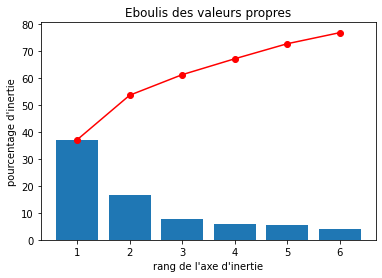

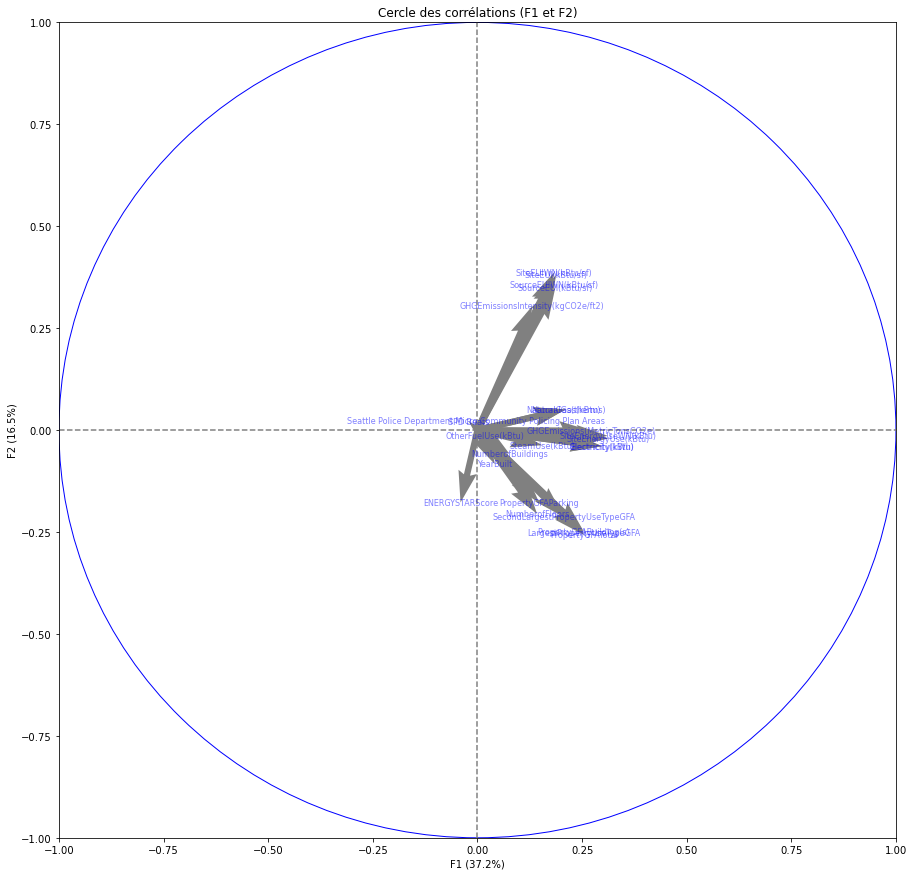

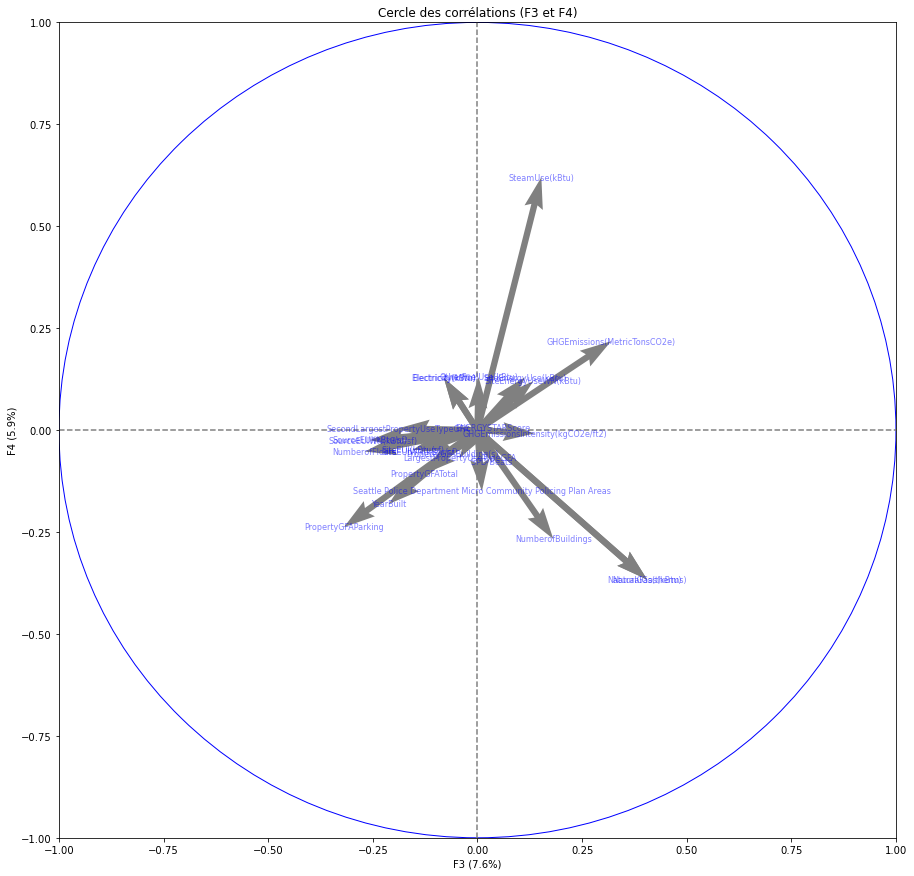

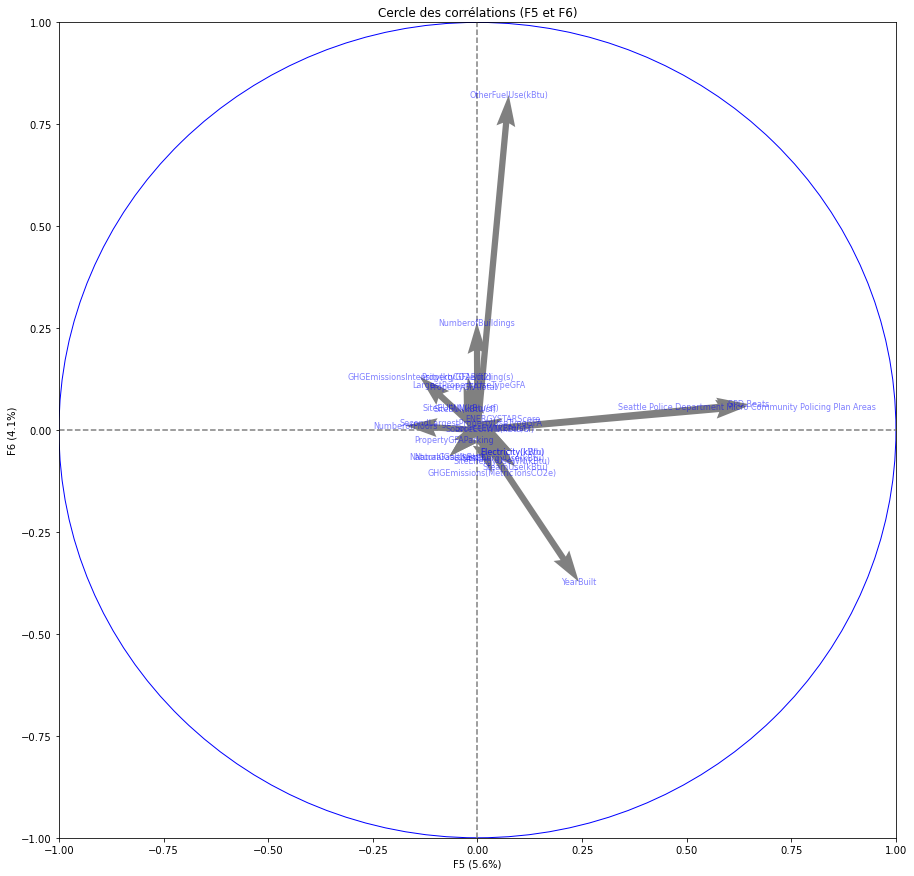

In [29]:
# choix du nombre de composantes à calculer
n_comp = 6

list_21=['YearBuilt', 
                         'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
                         'LargestPropertyUseTypeGFA', 'NumberofFloors', 
                         'SecondLargestPropertyUseTypeGFA','ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 
                         'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 
                         'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 
                         'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 
                         'Seattle Police Department Micro Community Policing Plan Areas', 'SPD Beats']


# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_NRJ_2015[list_21]

# Nutri_score grade :
#nutri = [df_NRJ_2015.loc[Id, 'nutriscore_grade'] for Id in data_pca.index]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
#names = df7_noNa["product_name"] # ou data.index pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))


plt.show()


# --------------------------------




<AxesSubplot:>

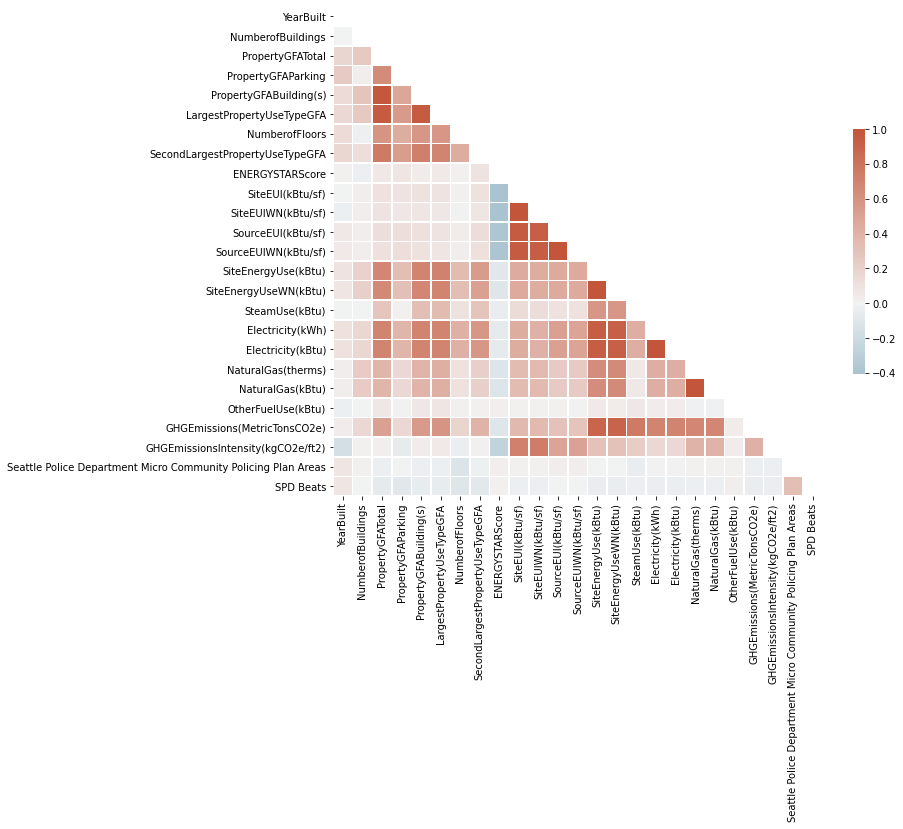

In [30]:
dfcorr=df_NRJ_2015[['YearBuilt','NumberofBuildings', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
                         'LargestPropertyUseTypeGFA', 'NumberofFloors', 
                         'SecondLargestPropertyUseTypeGFA','ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 
                         'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 
                         'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 
                         'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 
                         'Seattle Police Department Micro Community Policing Plan Areas', 'SPD Beats']]


corr = dfcorr.corr()

corr


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
corr

,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,NumberofFloors,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
YearBuilt,1.000000,-0.004222,0.181080,0.248852,0.141241,0.159239,0.142683,0.171239,0.011589,-0.008990,-0.025789,0.057837,0.051472,0.085684,0.081467,0.001868,0.110454,0.110454,0.028143,0.028143,-0.022980,0.035245,-0.159084,0.077662,0.075032
NumberofBuildings,-0.004222,1.000000,0.262966,0.033448,0.294679,0.260629,-0.017514,0.121005,-0.023697,0.027440,0.029103,0.026978,0.027914,0.194295,0.211656,-0.003271,0.167999,0.167999,0.245667,0.245667,-0.001656,0.165773,0.017461,0.009453,-0.008761
PropertyGFATotal,0.181080,0.262966,1.000000,0.648706,0.978159,0.954736,0.596612,0.754902,0.056831,0.106480,0.087989,0.127974,0.111642,0.678425,0.662026,0.284826,0.697844,0.697844,0.381319,0.381319,0.062270,0.518440,0.022912,-0.025815,-0.065763
PropertyGFAParking,0.248852,0.033448,0.648706,1.000000,0.476348,0.553280,0.445613,0.531953,0.079775,0.086773,0.072167,0.127134,0.117201,0.326776,0.315039,0.012191,0.390832,0.390832,0.165459,0.165459,0.005551,0.166104,-0.056237,-0.002896,-0.086471
PropertyGFABuilding(s),0.141241,0.294679,0.978159,0.476348,1.000000,0.951616,0.567785,0.726876,0.044616,0.099318,0.081945,0.113127,0.096971,0.694545,0.678805,0.325735,0.699484,0.699484,0.395353,0.395353,0.070426,0.553595,0.041830,-0.029034,-0.052361
LargestPropertyUseTypeGFA,0.159239,0.260629,0.954736,0.553280,0.951616,1.000000,0.579017,0.695961,0.056182,0.084313,0.068482,0.094334,0.079677,0.705917,0.694755,0.346079,0.696225,0.696225,0.426108,0.426107,0.081979,0.583793,0.052804,-0.025979,-0.048277
NumberofFloors,0.142683,-0.017514,0.596612,0.445613,0.567785,0.579017,1.000000,0.444142,0.012372,0.015420,0.002801,0.040549,0.032039,0.343528,0.327366,0.096026,0.411062,0.411062,0.107321,0.107321,0.011808,0.191113,-0.033674,-0.118129,-0.105375
SecondLargestPropertyUseTypeGFA,0.171239,0.121005,0.754902,0.531953,0.726876,0.695961,0.444142,1.000000,0.088846,0.100464,0.082355,0.129498,0.114586,0.541671,0.522550,0.290508,0.576130,0.576130,0.215424,0.215424,0.013972,0.407436,0.010074,-0.017761,-0.077594
ENERGYSTARScore,0.011589,-0.023697,0.056831,0.079775,0.044616,0.056182,0.012372,0.088846,1.000000,-0.394656,-0.403965,-0.375381,-0.386972,-0.090146,-0.096485,-0.041915,-0.064731,-0.064731,-0.113095,-0.113095,0.023561,-0.097862,-0.262729,0.019838,0.010814
SiteEUI(kBtu/sf),-0.008990,0.027440,0.106480,0.086773,0.099318,0.084313,0.015420,0.100464,-0.394656,1.000000,0.995946,0.950709,0.953012,0.451255,0.451588,0.136801,0.440049,0.440049,0.348296,0.348296,0.016998,0.360583,0.721475,0.014941,-0.020929


## On voit de cette façon quelles sont les variables qui sont corrélées et on peut déjà réfléchir à en supprimer certaines

In [33]:
df_NRJ_2015.isna().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
Location                                                            0
DefaultData                                                         1
Zip Codes                                                           0
CouncilDistrictCode                                                 0
SecondLargestPropertyUseType                                     1781
ListOfAllPropertyUseTypes                                         127
LargestPropertyUseType                                            136
Neighborhood                                                        0
ComplianceStatus    

In [5]:
df_NRJ_2016.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


1.1. Emission C02 : 10 lignes ne sont pas complètes


GHGEmissions(MetricTonsCO2e)  
GHGEmissionsIntensity(kgCO2e/ft2)

--> on choisira GHGEmissions(MetricTonsCO2e)



1.2. Consommation totale d'énergie : 10 lignes ne sont pas complètes

SiteEUI(kBtu/sf)                                                   
SiteEUIWN(kBtu/sf)                                                 
SourceEUI(kBtu/sf)                                                 
SourceEUIWN(kBtu/sf)                                      
SiteEnergyUse(kBtu)                                         
SiteEnergyUseWN(kBtu)                                           
SteamUse(kBtu)                                                    
Electricity(kWh)                                                   
Electricity(kBtu) 


--> on choisira SiteEnergyUse(kBtu)

In [34]:
df_NRJ_2015.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
Location                                                          object
DefaultData                                                       object
Zip Codes                                                          int64
CouncilDistrictCode                                                int64
SecondLargestPropertyUseType                                      object
ListOfAllPropertyUseTypes                                         object
LargestPropertyUseType                                            object
Neighborhood                                       

In [35]:
df_NRJ_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,DefaultData,Zip Codes,CouncilDistrictCode,SecondLargestPropertyUseType,ListOfAllPropertyUseTypes,LargestPropertyUseType,Neighborhood,ComplianceStatus,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,NumberofFloors,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",No,18081,7,NaN,Hotel,Hotel,DOWNTOWN,Compliant,1927,1,88434,0,88434,88434.0,12.0,0.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,14.0,31.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",No,18081,7,Parking,"Hotel, Parking, Restaurant",Hotel,DOWNTOWN,Compliant,1996,1,103566,15064,88502,83880.0,11.0,15064.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,14.0,31.0


In [36]:
df_NRJ_2015['TaxParcelIdentificationNumber'].value_counts()

925049346     5
3224049012    5
2400002       5
8632880000    4
7666203240    4
             ..
8592900345    1
1825049055    1
6851700060    1
1887550000    1
2771108040    1
Name: TaxParcelIdentificationNumber, Length: 3245, dtype: int64

In [37]:
df_NRJ_2015[df_NRJ_2015['NumberofBuildings']==2]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,DefaultData,Zip Codes,CouncilDistrictCode,SecondLargestPropertyUseType,ListOfAllPropertyUseTypes,LargestPropertyUseType,Neighborhood,ComplianceStatus,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,NumberofFloors,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
1884,23637,2015,Multifamily LR (1-4),Low-Rise Multifamily,J&E APTS,7701400030,"{'latitude': '47.53115578', 'longitude': '-122.2695897', 'human_address': '{""address"": ""7910 RAINIER AVE S"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98118""}'}",No,18800,2,NaN,Multifamily Housing,Multifamily Housing,SOUTHEAST,Compliant,1956,2,21708,0,21708,21708.0,2.0,0.0,59.0,60.6,72.7,102.2,114.8,1315298.0,1577240.0,0.0,117310.0,400280.0,9150.0,915035.0,0.0,51.39,2.29,7.0,45.0
1944,23846,2015,NonResidential,Small- and Mid-Sized Office,DIAMOND BUILDING,7666202225,"{'latitude': '47.61843872', 'longitude': '-122.35874939', 'human_address': '{""address"": ""3161 ELLIOTT AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}",No,19576,7,NaN,Office,Office,DOWNTOWN,Compliant,1979,2,34030,0,34030,34030.0,3.0,0.0,49.0,51.6,53.4,150.6,151.7,1757194.0,1818828.0,0.0,459720.0,1568628.0,1886.0,188631.0,0.0,20.95,0.42,5.0,9.0
2193,24659,2015,Multifamily LR (1-4),Low-Rise Multifamily,CARROLL AND KENSINGTON APTS,6847700395,"{'latitude': '47.62129098', 'longitude': '-122.3269098', 'human_address': '{""address"": ""305 BELLEVUE AVE E"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98102""}'}",No,18376,3,Parking,"Multifamily Housing, Parking",Multifamily Housing,EAST,Compliant,1908,2,74516,23222,51294,51294.0,4.0,23222.0,89.0,28.9,31.6,86.3,94.5,1482997.0,1621055.0,0.0,402067.0,1371908.0,1111.0,111146.0,0.0,15.47,0.13,8.0,5.0
2570,26007,2015,Multifamily LR (1-4),Low-Rise Multifamily,BOLYSTON COURT APTS,8804900045,"{'latitude': '47.61669266', 'longitude': '-122.3228535', 'human_address': '{""address"": ""700 E OLIVE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98122""}'}",No,19578,3,Parking,"Multifamily Housing, Parking",Multifamily Housing,EAST,Compliant,1948,2,31457,10384,21073,21073.0,2.0,0.0,86.0,56.2,65.0,83.2,92.5,1183967.0,1370487.0,0.0,71680.0,244583.0,9394.0,939394.0,0.0,51.60,1.61,8.0,11.0
3219,49721,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEST NEWTON FLATS,2771604405,"{'latitude': '47.63658205', 'longitude': '-122.3866334', 'human_address': '{""address"": ""2301 W NEWTON ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98199""}'}",Yes,18235,7,NaN,Multifamily Housing,Multifamily Housing,MAGNOLIA / QUEEN ANNE,Compliant,2012,2,21753,10642,11111,21753.0,3.0,0.0,41.0,37.3,43.1,101.6,114.1,812422.0,937637.0,0.0,190319.0,649395.0,1631.0,163054.0,0.0,13.19,0.48,33.0,27.0


#Variables à supprimer :

PropertyGFAParking et PropertyGFABuilding(s)    (PropertyGFATotal en est la somme)

LargestPropertyUseTypeGFA prend le max entre les deux valeurs du dessus

SecondLargestPropertyUseTypeGFA prend le deuxième max entre les deux valeurs du dessus.

SiteEUIWN(kBtu/sf) (équivalent de SiteEUI sauf que les conditions météo sont prises en compte)

SourceEUIWN(kBtu/sf) (équivalent de SourceEUI sauf que les conditions météo sont prises en compte)

SiteEnergyUseWN(kBtu) (équivalent de SiteEnergyUse sauf que les conditions météo sont prises en compte)

Electricity(kWh) (équivalent de Electricity(kBtu) mais unité différente)

NaturalGas(therms) (équivalent de NaturalGas(kBtu) mais unité différente)

SecondLargestPropertyUseType et ListOfAllPropertyUseTypes et LargestPropertyUseType (on garde PrimaryPropertyType qui les résume )


In [38]:
drop_2015 = ['PropertyGFAParking','PropertyGFABuilding(s)','SiteEUIWN(kBtu/sf)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
            'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Electricity(kWh)','NaturalGas(therms)',
            'SecondLargestPropertyUseType','ListOfAllPropertyUseTypes','LargestPropertyUseType']

<AxesSubplot:>

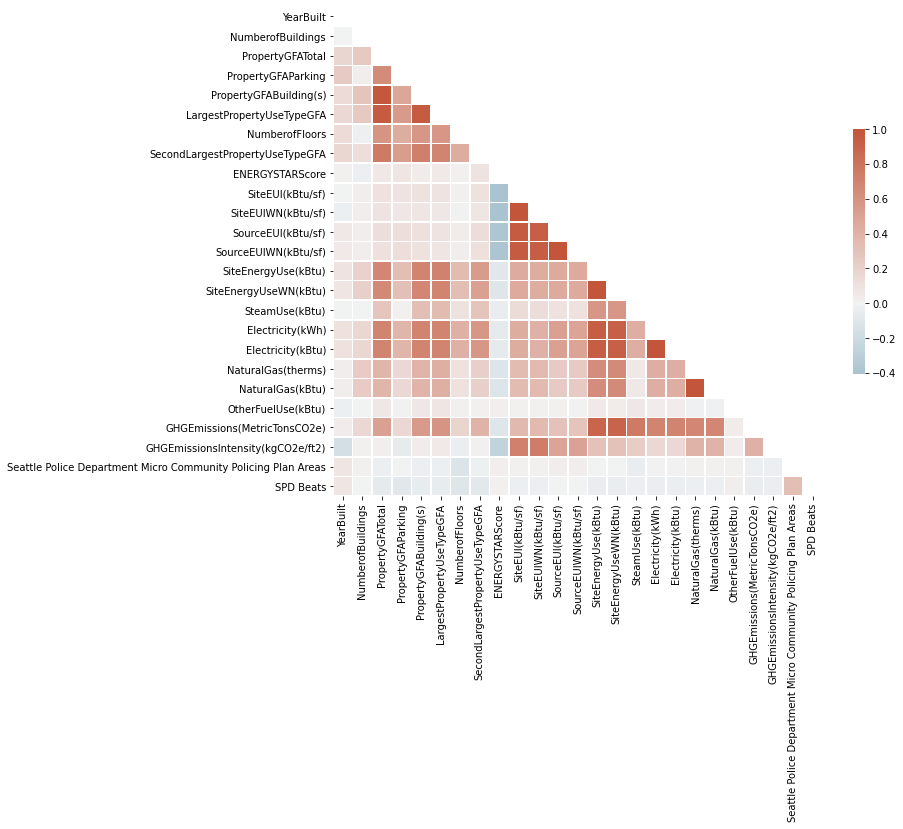

In [39]:
dfcorr=df_NRJ_2015[['YearBuilt','NumberofBuildings', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
                         'LargestPropertyUseTypeGFA', 'NumberofFloors', 
                         'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 
                         'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 
                         'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 
                         'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 
                         'Seattle Police Department Micro Community Policing Plan Areas', 'SPD Beats']]


corr = dfcorr.corr()

corr


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
df_NRJ_2016.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [41]:
df_NRJ_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,0.0,0.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,0.0,0.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,0.0,0.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


<AxesSubplot:>

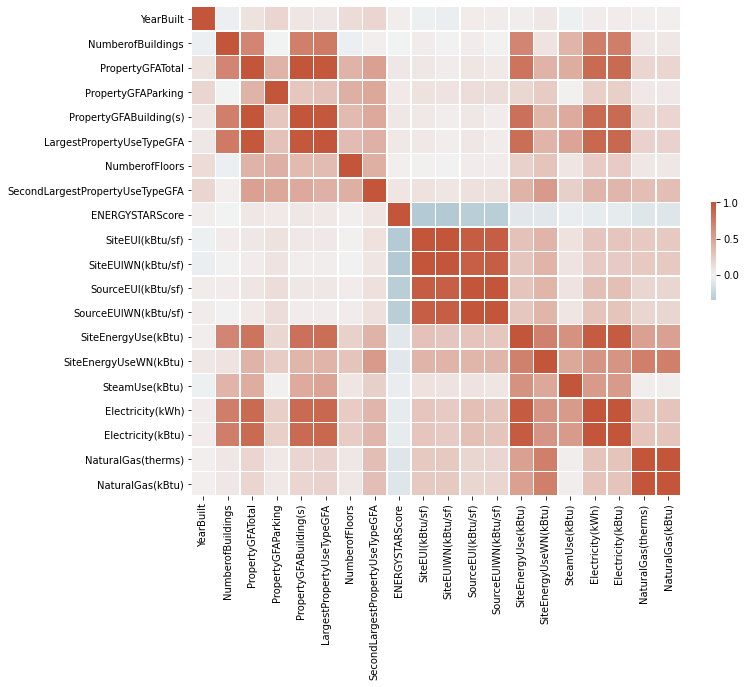

In [42]:
dfcorr2016=df_NRJ_2016[['YearBuilt','NumberofBuildings', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
                         'LargestPropertyUseTypeGFA', 'NumberofFloors', 
                         'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 
                         'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 
                         'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']]


corr2016 = dfcorr2016.corr()

corr2016


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2016,  cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .2})

In [43]:
df_NRJ_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,DefaultData,Zip Codes,CouncilDistrictCode,SecondLargestPropertyUseType,ListOfAllPropertyUseTypes,LargestPropertyUseType,Neighborhood,ComplianceStatus,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,NumberofFloors,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",No,18081,7,NaN,Hotel,Hotel,DOWNTOWN,Compliant,1927,1,88434,0,88434,88434.0,12.0,0.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,14.0,31.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",No,18081,7,Parking,"Hotel, Parking, Restaurant",Hotel,DOWNTOWN,Compliant,1996,1,103566,15064,88502,83880.0,11.0,15064.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,14.0,31.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",Yes,18081,7,Parking,"Hotel, Parking, Swimming Pool",Hotel,DOWNTOWN,Compliant,1969,1,961990,0,961990,757243.0,41.0,100000.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,56.0,31.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",No,18081,7,NaN,Hotel,Hotel,DOWNTOWN,Compliant,1926,1,61320,0,61320,61320.0,10.0,0.0,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,56.0,31.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}'}",No,19576,7,Parking,"Hotel, Parking, Swimming Pool",Hotel,DOWNTOWN,Compliant,1980,1,119890,12460,107430,123445.0,18.0,68009.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,56.0,31.0


#Variables à supprimer :

PropertyGFAParking et PropertyGFABuilding(s)    (PropertyGFATotal en est la somme)

LargestPropertyUseTypeGFA prend le max entre les deux valeurs du dessus

SecondLargestPropertyUseTypeGFA prend le deuxième max entre les deux valeurs du dessus.

SiteEUIWN(kBtu/sf) (équivalent de SiteEUI sauf que les conditions météo sont prises en compte)

SourceEUIWN(kBtu/sf) (équivalent de SourceEUI sauf que les conditions météo sont prises en compte)

SiteEnergyUseWN(kBtu) (équivalent de SiteEnergyUse sauf que les conditions météo sont prises en compte)

Electricity(kWh) (équivalent de Electricity(kBtu) mais unité différente)

NaturalGas(therms) (équivalent de NaturalGas(kBtu) mais unité différente)

SecondLargestPropertyUseType et ListOfAllPropertyUseTypes et LargestPropertyUseType (on garde PrimaryPropertyType qui les résume )

In [44]:
drop_2016 = ['PropertyGFAParking','PropertyGFABuilding(s)','SiteEUIWN(kBtu/sf)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
            'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Electricity(kWh)','NaturalGas(therms)',
            'SecondLargestPropertyUseType','ListOfAllPropertyUseTypes','LargestPropertyUseType']

In [45]:
df_NRJ_2016.drop(drop_2016,axis='columns',inplace=True)

In [46]:
df_NRJ_2015.drop(drop_2015,axis='columns',inplace=True)

In [47]:
df_NRJ_2015.shape

(3340, 28)

In [48]:
df_NRJ_2016.shape

(3376, 30)

In [49]:
# Qu'est-ce qu'on fait des variables qualitatives nominales ?

In [50]:
# d'abord, on va spliter la variable location


df_NRJ_2015['split'] = df_NRJ_2015['Location'].str.split(':')
df_NRJ_2015

#df_NRJ_2015['G'] = df_NRJ_2015['F'].str.split(':')
#df_NRJ_2015

#df_NRJ_2015['H'], df_NRJ_2015['I'],df_NRJ_2015['J'],df_NRJ_2015['K'],df_NRJ_2015['L']= df_NRJ_2015['Location'].str.split(':', 4).str
#df_NRJ_2015

#df_NRJ_2015['M'], df_NRJ_2015['N'],df_NRJ_2015['O'],df_NRJ_2015['P']=df_NRJ_2015['L'].str.split(':', 4).str
df_NRJ_2015.head(2)

df_NRJ_2015.rename(columns={'I':'Latitude'},inplace=True)
df_NRJ_2015.rename(columns={'J':'Longitude'},inplace=True)
df_NRJ_2015.rename(columns={'M':'Address'},inplace=True)
df_NRJ_2015.rename(columns={'N':'City'},inplace=True)
df_NRJ_2015.rename(columns={'O':'State'},inplace=True)
df_NRJ_2015.rename(columns={'P':'ZipCode'},inplace=True)

df_NRJ_2015.drop(['H','K'],axis='columns',inplace=True)

df_NRJ_2015.head(2)

df_NRJ_2015['Longitude1']=df_NRJ_2015['Longitude'].str[:-18].str[2:]

df_NRJ_2015['Longitude1']

df_NRJ_2015['Latitude1']=df_NRJ_2015['Latitude'].str[:-14].str[2:]

df_NRJ_2015['Latitude1']

df_NRJ_2015['Address1']=df_NRJ_2015['Address'].str[:-9].str[2:]

df_NRJ_2015.head(2)

df_NRJ_2015['City1']=df_NRJ_2015['City'].str[:-10].str[2:]

df_NRJ_2015['City1']

df_NRJ_2015['State1']=df_NRJ_2015['State'].str[:-8].str[2:]

df_NRJ_2015['State1']

df_NRJ_2015['ZipCode1']=df_NRJ_2015['ZipCode'].str[:-4].str[2:]

df_NRJ_2015['ZipCode1']

df_NRJ_2015.head(2)

df_NRJ_2015.drop(['split','Longitude','Latitude','Address','City','State','ZipCode'],axis='columns',inplace=True)

df_NRJ_2015.rename(columns={'ZipCode1':'ZipCode'},inplace=True)
df_NRJ_2015.rename(columns={'State1':'State'},inplace=True)
df_NRJ_2015.rename(columns={'City1':'City'},inplace=True)
df_NRJ_2015.rename(columns={'Address1':'Address'},inplace=True)
df_NRJ_2015.rename(columns={'Latitude1':'Latitude'},inplace=True)
df_NRJ_2015.rename(columns={'Longitude1':'Longitude'},inplace=True)



df_NRJ_2015.head(2)

In [51]:
df_NRJ_2015.drop(['Location'],axis='columns',inplace=True)

In [52]:
# Utiliser V2 désormais

In [53]:
# df_NRJ_2015.to_csv('2015-building-energy-benchmarking_V2.csv')


In [54]:
# df_NRJ_2015.to_csv('2015-building-energy-benchmarking_V2.csv')

In [55]:
df_NRJ_2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,DefaultData,Zip Codes,CouncilDistrictCode,Neighborhood,ComplianceStatus,YearBuilt,NumberofBuildings,PropertyGFATotal,NumberofFloors,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,No,18081,7,DOWNTOWN,Compliant,1927,1,88434,12.0,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,0.0,249.43,2.64,14.0,31.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,No,18081,7,DOWNTOWN,Compliant,1996,1,103566,11.0,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,0.0,263.51,2.38,14.0,31.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,Yes,18081,7,DOWNTOWN,Compliant,1969,1,961990,41.0,18.0,96.6,242.7,73130656.0,19660404.0,49762435.0,3709900.0,0.0,2061.48,1.92,56.0,31.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,No,18081,7,DOWNTOWN,Compliant,1926,1,61320,10.0,1.0,460.4,636.3,28229320.0,23458518.0,2769023.0,2001894.0,0.0,1936.34,31.38,56.0,31.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,No,19576,7,DOWNTOWN,Compliant,1980,1,119890,18.0,67.0,120.1,228.8,14829099.0,0.0,6066245.0,8763105.0,0.0,507.70,4.02,56.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,No,18379,2,DOWNTOWN,Compliant,2000,1,44650,4.0,71.0,25.6,80.4,1142949.0,0.0,1142996.0,0.0,0.0,7.97,0.07,26.0,16.0
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,No,18383,4,NORTHEAST,Compliant,2014,1,42393,7.0,98.0,48.6,124.2,1543282.0,0.0,1111352.0,431976.0,0.0,30.69,0.61,60.0,38.0
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,No,19576,7,DOWNTOWN,Compliant,2015,1,319481,40.0,79.0,52.7,93.1,16834414.0,0.0,5767761.0,11066893.0,0.0,627.97,1.89,56.0,7.0
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,No,18792,4,NORTHEAST,Compliant,1981,1,48230,3.0,44.0,34.8,109.4,777064.0,0.0,777096.0,0.0,0.0,5.42,0.04,55.0,48.0


In [56]:
df_NRJ_2015 = pd.read_csv('2015-building-energy-benchmarking_V2.csv')

In [57]:
df_NRJ_2015.drop(["Unnamed: 0"],axis='columns',inplace=True)

In [58]:
set(list(df_NRJ_2015.columns))-set(list(df_NRJ_2016.columns))

{'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'L',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [59]:
set(list(df_NRJ_2016.columns))-set(list(df_NRJ_2015.columns))

{'GHGEmissionsIntensity',
 'ThirdLargestPropertyUseTypeGFA',
 'TotalGHGEmissions'}

In [60]:
df_NRJ_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,DefaultData,Zip Codes,CouncilDistrictCode,Neighborhood,ComplianceStatus,YearBuilt,NumberofBuildings,PropertyGFATotal,NumberofFloors,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,L,Longitude,Latitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,No,18081,7,DOWNTOWN,Compliant,1927,1,88434,12.0,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,0.0,249.43,2.64,14.0,31.0,"""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",-122.337997,47.612190,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,No,18081,7,DOWNTOWN,Compliant,1996,1,103566,11.0,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,0.0,263.51,2.38,14.0,31.0,"""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",-122.333358,47.613106,724 PINE ST,SEATTLE,WA,98101


In [61]:
df_NRJ_2016.rename(columns={'TotalGHGEmissions':'GHGEmissions(MetricTonsCO2e)'},inplace=True)
df_NRJ_2016.rename(columns={'GHGEmissionsIntensity':'GHGEmissionsIntensity(kgCO2e/ft2)'},inplace=True)

In [62]:
df_NRJ_2016.rename(columns={'Zip Codes':'ZipCode'},inplace=True)

In [63]:
df_NRJ_2016.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0.0,60.0,81.699997,182.500000,7226362.5,2003882.0,3946027.0,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,4622.0,61.0,94.800003,176.100006,8387933.0,0.0,3242851.0,5145082.0,False,Compliant,295.86,2.86


In [64]:
list(df_NRJ_2016.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)']

In [65]:
df_NRJ_2015=df_NRJ_2015[['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)', 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes']]

In [66]:
df_NRJ_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,98101,659000030,7,DOWNTOWN,47.612190,-122.337997,1927,1,12.0,88434,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,No,Compliant,249.43,2.64,0.0,31.0,14.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,98101,659000220,7,DOWNTOWN,47.613106,-122.333358,1996,1,11.0,103566,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,No,Compliant,263.51,2.38,0.0,31.0,14.0,18081


In [67]:
df_NRJ_2016.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0.0,60.0,81.699997,182.500000,7226362.5,2003882.0,3946027.0,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,4622.0,61.0,94.800003,176.100006,8387933.0,0.0,3242851.0,5145082.0,False,Compliant,295.86,2.86


In [68]:


# obj :
# 1. vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie 
# de bâtiments pour lesquels elles n’ont pas encore été mesurées.
# Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale 
# (taille et usage des bâtiments, mention de travaux récents, date de construction..)



# 2. Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, 
# qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.

In [69]:
# 1.1. Emission C02 : on choisira GHGEmissions(MetricTonsCO2e)

# 1.2 Conso énergétique : on choisira Electricity(kWh)

In [70]:
# Pour les variables quali, on va d'abord les encoder en LabelEncoder pour leur donner une valeur numérique
# Ensuite, on fait un OneHotEncoder pour pouvoir exploiter ces données

In [71]:
df_NRJ_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,98101,659000030,7,DOWNTOWN,47.612190,-122.337997,1927,1,12.0,88434,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,No,Compliant,249.43,2.64,0.0,31.0,14.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,98101,659000220,7,DOWNTOWN,47.613106,-122.333358,1996,1,11.0,103566,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,No,Compliant,263.51,2.38,0.0,31.0,14.0,18081


In [72]:
df_NRJ_2015['PropertyName'].value_counts()

WAREHOUSE                        9
OFFICE BUILDING                  8
CLOVERDALE BUSINESS PARK         5
APARTMENTS                       4
KENYON BUSINESS PARK             3
                                ..
1518 5TH AVE OFFICE              1
WESTWOOD VILLAGE - BUILDING E    1
SAXE APTS                        1
UNIVERSITY CLUB                  1
AUDITORIUM APARTMENTS            1
Name: PropertyName, Length: 3287, dtype: int64

In [73]:
df_NRJ_2015.drop(['PropertyName','City','State','Latitude',
                  'Longitude','DefaultData','Zip Codes'],axis='columns',inplace=True)



In [74]:

df_NRJ_2016.drop(['PropertyName','City','State','Latitude',
                  'Longitude','DefaultData'],axis='columns',inplace=True)

In [75]:
df_NRJ_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas
0,1,2015,NonResidential,Hotel,405 OLIVE WAY,98101,659000030,7,DOWNTOWN,1927,1,12.0,88434,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,Compliant,249.43,2.64,0.0,31.0,14.0
1,2,2015,NonResidential,Hotel,724 PINE ST,98101,659000220,7,DOWNTOWN,1996,1,11.0,103566,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,Compliant,263.51,2.38,0.0,31.0,14.0


In [76]:
df_NRJ_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas
0,1,2015,NonResidential,Hotel,405 OLIVE WAY,98101,659000030,7,DOWNTOWN,1927,1,12.0,88434,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,Compliant,249.43,2.64,0.0,31.0,14.0
1,2,2015,NonResidential,Hotel,724 PINE ST,98101,659000220,7,DOWNTOWN,1996,1,11.0,103566,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,Compliant,263.51,2.38,0.0,31.0,14.0


In [77]:
df_NRJ_2016.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,1927,1.0,12,88434,0.0,60.0,81.699997,182.500000,7226362.5,2003882.0,3946027.0,1276453.0,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,1996,1.0,11,103566,4622.0,61.0,94.800003,176.100006,8387933.0,0.0,3242851.0,5145082.0,Compliant,295.86,2.86


In [78]:
df_NRJ_2016['Address'] = df_NRJ_2016['Address'].str.lower()

In [79]:
df_NRJ_2015['Address'] = df_NRJ_2015['Address'].str.lower()

In [80]:
df_NRJ_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas
0,1,2015,NonResidential,Hotel,405 olive way,98101,659000030,7,DOWNTOWN,1927,1,12.0,88434,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,Compliant,249.43,2.64,0.0,31.0,14.0
1,2,2015,NonResidential,Hotel,724 pine st,98101,659000220,7,DOWNTOWN,1996,1,11.0,103566,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,Compliant,263.51,2.38,0.0,31.0,14.0


In [81]:
variable_quanti_2015=['NumberofBuildings','NumberofFloors','PropertyGFATotal','ENERGYSTARScore',
                     'SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)',
                     'Electricity(kBtu)','NaturalGas(kBtu)','GHGEmissions(MetricTonsCO2e)',
                     'GHGEmissionsIntensity(kgCO2e/ft2)']

variable_quanti_2016=['NumberofBuildings','NumberofFloors','PropertyGFATotal','ENERGYSTARScore',
                     'SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)',
                     'Electricity(kBtu)','NaturalGas(kBtu)','GHGEmissions(MetricTonsCO2e)',
                     'GHGEmissionsIntensity(kgCO2e/ft2)']

variable_quali_2015=['OSEBuildingID','DataYear','BuildingType','PrimaryPropertyType',
                    'Address','ZipCode','TaxParcelIdentificationNumber',
                    'CouncilDistrictCode','Neighborhood','YearBuilt',
                    'ComplianceStatus']

variable_quali_2016=['OSEBuildingID','DataYear','BuildingType','PrimaryPropertyType',
                    'Address','ZipCode','TaxParcelIdentificationNumber',
                    'CouncilDistrictCode','Neighborhood','YearBuilt',
                    'ComplianceStatus']

In [82]:
for i in variable_quali_2015:

    print(df_NRJ_2015[i].value_counts())
    print()


24688    1
20987    1
661      1
657      1
23182    1
        ..
21732    1
19679    1
25822    1
24600    1
8        1
Name: OSEBuildingID, Length: 3340, dtype: int64

2015    3340
Name: DataYear, dtype: int64

NonResidential          1461
Multifamily LR (1-4)    1029
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Nonresidential COS        68
Campus                    22
Name: BuildingType, dtype: int64

Low-Rise Multifamily           998
Mid-Rise Multifamily           539
Small- and Mid-Sized Office    297
Other                          258
Non-Refrigerated Warehouse     187
Large Office                   171
K-12 School                    136
Mixed Use Property             126
High-Rise Multifamily          103
Retail Store                   100
Hotel                           73
Worship Facility                72
Distribution Center\n           51
Senior Care Community           43
Medical Office                  43
Supermarket/Grocery Store

In [83]:
# 2015 et 2016 : 
# A priori, les variables sur lesquelles nous pourrons appliquer un LabelEncoder sont :
# BuildingType, Neighborhood, CouncilDistrictCode, ComplianceStatus voire : PrimaryPropertyType
# YearBuilt est une variable importante : nous pouvons l'encoder en décennie par exemple (1970-1979 : 70',...)


# y : SiteEnergyUse(kBtu)


# on rassemble les deux df en un :



In [84]:
df_NRJ_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,405 olive way,98101.0,0659000030,7,DOWNTOWN,1927,1.0,12,88434,0.0,60.0,81.699997,182.500000,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,724 pine street,98101.0,0659000220,7,DOWNTOWN,1996,1.0,11,103566,4622.0,61.0,94.800003,176.100006,8.387933e+06,0.00,3.242851e+06,5.145082e+06,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,1900 5th avenue,98101.0,0659000475,7,DOWNTOWN,1969,1.0,41,956110,0.0,43.0,96.000000,241.899994,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,620 stewart st,98101.0,0659000640,7,DOWNTOWN,1926,1.0,10,61320,0.0,56.0,110.800003,216.199997,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,401 lenora st,98121.0,0659000970,7,DOWNTOWN,1980,1.0,18,175580,0.0,75.0,114.800003,211.399994,1.417261e+07,0.00,5.368607e+06,8.803998e+06,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,1600 s dakota st,NaN,1624049080,2,GREATER DUWAMISH,1990,1.0,1,12294,0.0,46.0,69.099998,161.699997,8.497457e+05,0.00,5.242709e+05,3.254750e+05,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,719 8th ave s,NaN,3558300000,2,DOWNTOWN,2004,1.0,1,16000,0.0,NaN,59.400002,114.199997,9.502762e+05,0.00,3.965461e+05,5.537300e+05,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,1920 1st ave w,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0.0,NaN,438.200012,744.799988,5.765898e+06,0.00,1.792159e+06,3.973739e+06,Compliant,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,8319 8th ave s,NaN,7883603155,1,GREATER DUWAMISH,1989,1.0,1,14101,484.0,NaN,51.000000,105.300003,7.194712e+05,0.00,3.488702e+05,3.706010e+05,Compliant,22.11,1.57


#### On concatène les deux df :

In [85]:
df_NRJ = pd.concat([df_NRJ_2015,df_NRJ_2016], ignore_index=True)


df_NRJ

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,ThirdLargestPropertyUseTypeGFA
0,1,2015,NonResidential,Hotel,405 olive way,98101.0,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,65.0,78.900000,173.500000,6.981428e+06,2023032.0,3.686160e+06,1.272388e+06,Compliant,249.43,2.64,0.0,31.0,14.0,NaN
1,2,2015,NonResidential,Hotel,724 pine st,98101.0,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,51.0,94.400000,191.300000,8.354235e+06,0.0,3.905411e+06,4.448985e+06,Compliant,263.51,2.38,0.0,31.0,14.0,NaN
2,3,2015,NonResidential,Hotel,1900 5th ave,98101.0,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,18.0,96.600000,242.700000,7.313066e+07,19660404.0,4.976244e+07,3.709900e+06,Compliant,2061.48,1.92,0.0,31.0,56.0,NaN
3,5,2015,NonResidential,Hotel,620 stewart st,98101.0,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,1.0,460.400000,636.300000,2.822932e+07,23458518.0,2.769023e+06,2.001894e+06,Compliant,1936.34,31.38,0.0,31.0,56.0,NaN
4,8,2015,NonResidential,Hotel,401 lenora st,98121.0,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,67.0,120.100000,228.800000,1.482910e+07,0.0,6.066245e+06,8.763105e+06,Compliant,507.70,4.02,0.0,31.0,56.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50222,2016,Nonresidential COS,Office,1600 s dakota st,NaN,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,46.0,69.099998,161.699997,8.497457e+05,0.0,5.242709e+05,3.254750e+05,Error - Correct Default Data,20.94,1.70,NaN,NaN,NaN,0.0
6712,50223,2016,Nonresidential COS,Other,719 8th ave s,NaN,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,NaN,59.400002,114.199997,9.502762e+05,0.0,3.965461e+05,5.537300e+05,Compliant,32.17,2.01,NaN,NaN,NaN,0.0
6713,50224,2016,Nonresidential COS,Other,1920 1st ave w,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,NaN,438.200012,744.799988,5.765898e+06,0.0,1.792159e+06,3.973739e+06,Compliant,223.54,16.99,NaN,NaN,NaN,0.0
6714,50225,2016,Nonresidential COS,Mixed Use Property,8319 8th ave s,NaN,7883603155,1,GREATER DUWAMISH,1989,1.0,1.0,14101,NaN,51.000000,105.300003,7.194712e+05,0.0,3.488702e+05,3.706010e+05,Compliant,22.11,1.57,NaN,NaN,NaN,484.0


# --------------------------

# création d'un nouveau CSV
# Reprendre là si beug



In [202]:
# df_NRJ.to_csv('All-building-energy-benchmarking.csv')


df_NRJ = pd.read_csv('All-building-energy-benchmarking.csv')

In [204]:
df_NRJ.drop(["Unnamed: 0"],axis='columns',inplace=True)

In [205]:
df_NRJ.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'Address', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ComplianceStatus', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'OtherFuelUse(kBtu)', 'SPD Beats', 'Seattle Police Department Micro Community Policing Plan Areas', 'ThirdLargestPropertyUseTypeGFA'], dtype='object')

In [206]:
df_NRJ.shape

(6716, 27)

In [207]:
df_NRJ.isna().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
Address                                                             0
ZipCode                                                            16
TaxParcelIdentificationNumber                                       2
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   8
NumberofFloors                                                      8
PropertyGFATotal                                                    0
ENERGYSTARScore                                                  1623
SiteEUI(kBtu/sf)    

In [208]:
df_NRJ['OSEBuildingID'].value_counts()

24688    2
23162    2
681      2
27304    2
677      2
        ..
25654    1
20152    1
365      1
838      1
50089    1
Name: OSEBuildingID, Length: 3432, dtype: int64

In [209]:
# filtrer sur les immeubles non résidentiels :

df_NRJ=df_NRJ[df_NRJ['BuildingType']=="NonResidential"]

In [210]:
df_NRJ=df_NRJ.reset_index(drop=True)

In [211]:
### Nan : 



In [212]:
### Attention Nan sur certaines colonnes :

# On remplace les Nan de NumberofFloors et NumberofBuildings par les rounds des moyennes


df_NRJ['NumberofBuildings']=df_NRJ['NumberofBuildings'].replace({0:np.nan})

df_NRJ['NumberofBuildings']=df_NRJ['NumberofBuildings'].fillna(round(df_NRJ['NumberofBuildings'].mean()))
df_NRJ['NumberofFloors']=df_NRJ['NumberofFloors'].fillna(round(df_NRJ['NumberofFloors'].mean()))

df_NRJ.isna().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
Address                                                             0
ZipCode                                                             0
TaxParcelIdentificationNumber                                       0
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      0
PropertyGFATotal                                                    0
ENERGYSTARScore                                                   913
SiteEUI(kBtu/sf)    

In [213]:
df_NRJ['NumberofBuildings'].describe()

count    2921.000000
mean        1.037316
std         0.390351
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         9.000000
Name: NumberofBuildings, dtype: float64

### Avant le LabelEncoder et OneHotEncoder, 

### créer trois colonnes pour voir si le bâtiment use en majorité Electricity, Gas or Steam ?


In [214]:
df_NRJ['Electricity']=0

In [215]:
df_NRJ['Steam']=0

In [216]:
df_NRJ['NaturalGas']=0

In [217]:
for i in range(df_NRJ.shape[0]):
    if df_NRJ['Electricity(kBtu)'][i]>df_NRJ['SteamUse(kBtu)'][i] and df_NRJ['Electricity(kBtu)'][i]>df_NRJ['NaturalGas(kBtu)'][i] :
        df_NRJ.at[i, 'Electricity']=1
    
    elif df_NRJ['SteamUse(kBtu)'][i]>df_NRJ['Electricity'][i] and df_NRJ['SteamUse(kBtu)'][i]>df_NRJ['NaturalGas(kBtu)'][i] :
        df_NRJ.at[i, 'Steam']=1
        
    elif df_NRJ['NaturalGas(kBtu)'][i]>df_NRJ['SteamUse(kBtu)'][i] and df_NRJ['NaturalGas(kBtu)'][i]>df_NRJ['Electricity'][i] :
        df_NRJ.at[i, 'NaturalGas']=1
    


In [218]:
df_NRJ.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,ThirdLargestPropertyUseTypeGFA,Electricity,Steam,NaturalGas
0,1,2015,NonResidential,Hotel,405 olive way,98101.0,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,Compliant,249.43,2.64,0.0,31.0,14.0,NaN,1,0,0
1,2,2015,NonResidential,Hotel,724 pine st,98101.0,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,Compliant,263.51,2.38,0.0,31.0,14.0,NaN,0,0,1


In [219]:
df_NRJ.shape

(2921, 30)

# Outliers 

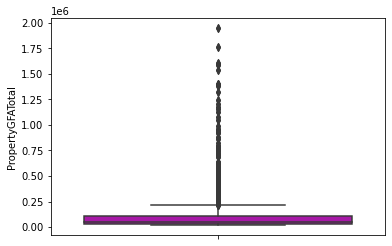

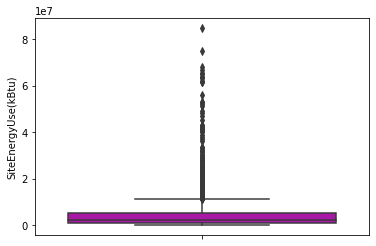

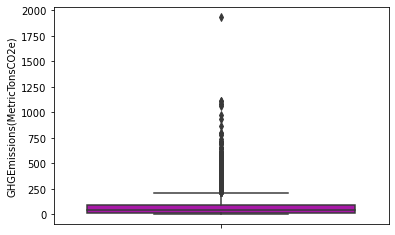

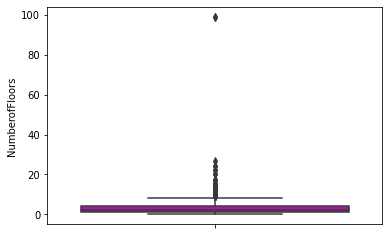

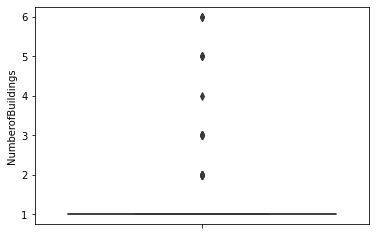

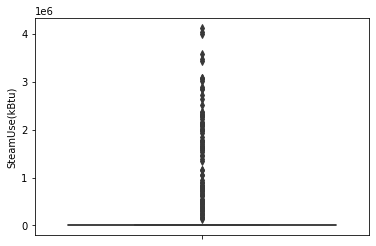

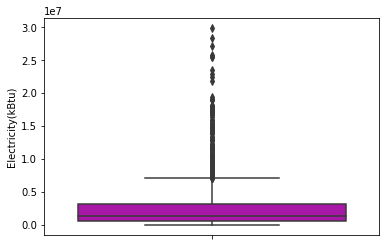

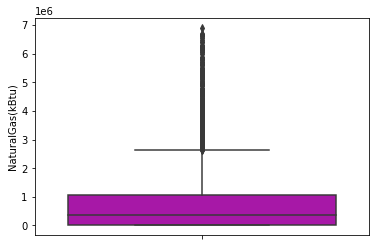

In [220]:
sns.boxplot(y='PropertyGFATotal',palette=["m", "g"],
            data=df_NRJ)
plt.show()

df_NRJ=df_NRJ[df_NRJ['PropertyGFATotal']<300000]

sns.boxplot(y='SiteEnergyUse(kBtu)',palette=["m", "g"],
            data=df_NRJ)
plt.show()

df_NRJ=df_NRJ[df_NRJ['SiteEnergyUse(kBtu)']<30000000]

sns.boxplot(y='GHGEmissions(MetricTonsCO2e)',palette=["m", "g"],
            data=df_NRJ)
plt.show()

df_NRJ=df_NRJ[df_NRJ['GHGEmissions(MetricTonsCO2e)']<400]

sns.boxplot(y='NumberofFloors',palette=["m", "g"],
            data=df_NRJ)
plt.show()

df_NRJ=df_NRJ[df_NRJ['NumberofFloors']<30]

sns.boxplot(y='NumberofBuildings',palette=["m", "g"],
            data=df_NRJ)
plt.show()

df_NRJ=df_NRJ[df_NRJ['NumberofBuildings']<20]

sns.boxplot(y='SteamUse(kBtu)',palette=["m", "g"],
            data=df_NRJ)
plt.show()

df_NRJ=df_NRJ[df_NRJ['SteamUse(kBtu)']<4000000]

sns.boxplot(y='Electricity(kBtu)',palette=["m", "g"],
            data=df_NRJ)
plt.show()

df_NRJ=df_NRJ[df_NRJ['Electricity(kBtu)']<20000000]

sns.boxplot(y='NaturalGas(kBtu)',palette=["m", "g"],
            data=df_NRJ)
plt.show()

#df_NRJ=df_NRJ[df_NRJ['NaturalGas(kBtu)']<]

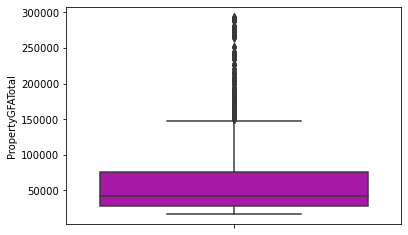

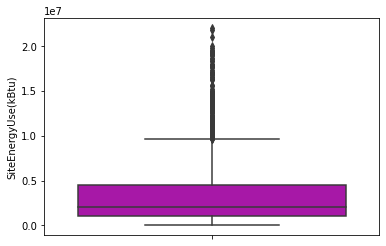

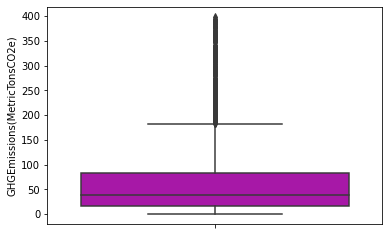

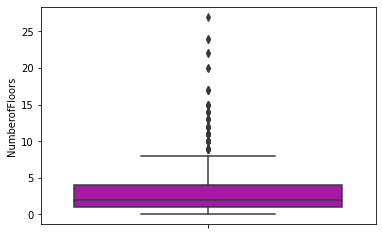

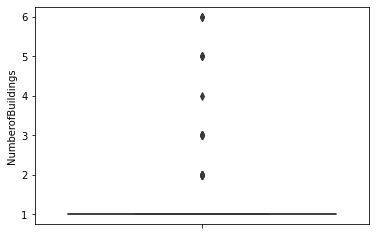

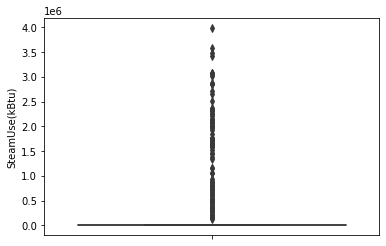

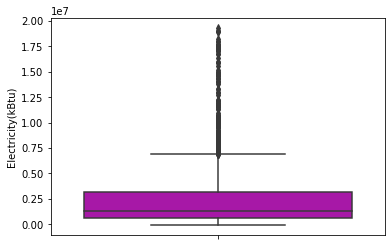

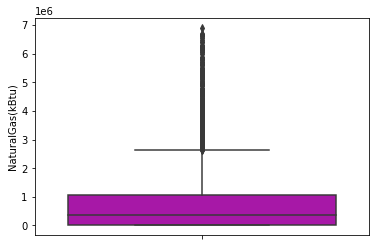

In [221]:
sns.boxplot(y='PropertyGFATotal',palette=["m", "g"],
            data=df_NRJ)
plt.show()
sns.boxplot(y='SiteEnergyUse(kBtu)',palette=["m", "g"],
            data=df_NRJ)
plt.show()
sns.boxplot(y='GHGEmissions(MetricTonsCO2e)',palette=["m", "g"],
            data=df_NRJ)
plt.show()
sns.boxplot(y='NumberofFloors',palette=["m", "g"],
            data=df_NRJ)
plt.show()
sns.boxplot(y='NumberofBuildings',palette=["m", "g"],
            data=df_NRJ)
plt.show()
sns.boxplot(y='SteamUse(kBtu)',palette=["m", "g"],
            data=df_NRJ)
plt.show()
sns.boxplot(y='Electricity(kBtu)',palette=["m", "g"],
            data=df_NRJ)
plt.show()
sns.boxplot(y='NaturalGas(kBtu)',palette=["m", "g"],
            data=df_NRJ)
plt.show()


### Puis supprimer toutes les colonnes qui sont des relevés.
### et on garde les data Compliant


In [222]:
df_NRJ=df_NRJ[df_NRJ['ComplianceStatus']=='Compliant']

In [223]:
df_NRJ.shape

(2511, 30)

### Puis voir quelle variable quali on utilise ? --> pour ça, on regarde la distrib


In [224]:
df_NRJ.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,ThirdLargestPropertyUseTypeGFA,Electricity,Steam,NaturalGas
0,1,2015,NonResidential,Hotel,405 olive way,98101.0,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,Compliant,249.43,2.64,0.0,31.0,14.0,NaN,1,0,0
1,2,2015,NonResidential,Hotel,724 pine st,98101.0,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,Compliant,263.51,2.38,0.0,31.0,14.0,NaN,0,0,1
5,10,2015,NonResidential,Hotel,1619 9th ave,98101.0,660000825,7,DOWNTOWN,1926,1.0,11.0,83008,25.0,76.9,149.5,6252842.0,0.0,2679698.0,3573255.0,Compliant,208.46,2.37,0.0,31.0,14.0,NaN,0,0,1
6,11,2015,NonResidential,Other,901 pine st,98101.0,660000955,7,DOWNTOWN,1926,1.0,8.0,102761,NaN,62.5,152.2,6426022.0,2003108.0,4108004.0,315079.0,Compliant,199.99,1.77,0.0,31.0,14.0,NaN,1,0,0
7,12,2015,NonResidential,Hotel,612 2nd ave,98104.0,939000080,7,DOWNTOWN,1904,1.0,15.0,163984,46.0,77.0,174.6,12633744.0,0.0,7355649.0,5278400.0,Compliant,331.61,1.83,0.0,19.0,14.0,NaN,1,0,0


In [225]:
# tout mettre en majuscule sur la colonne 'Neighborhood'

In [226]:
#df_NRJ['Neighborhood'] = map(lambda x: str(x).upper(), df_NRJ['Neighborhood'])
#df_NRJ['Neighborhood'] = df_NRJ['Neighborhood'].str.upper()
df_NRJ['Neighborhood']=df_NRJ['Neighborhood'].str.upper()

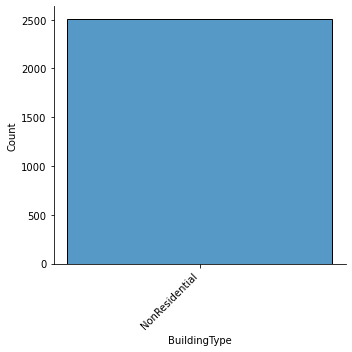

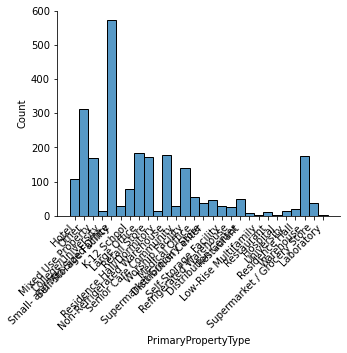

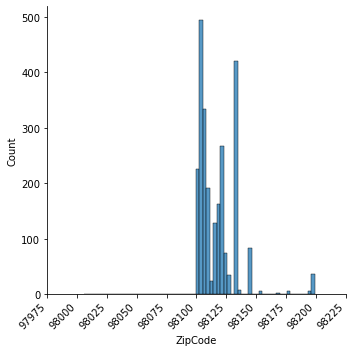

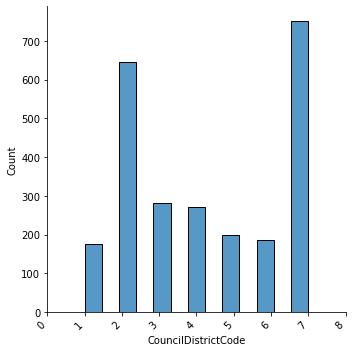

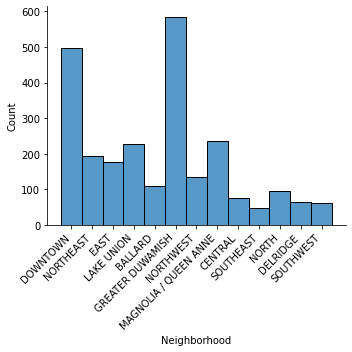

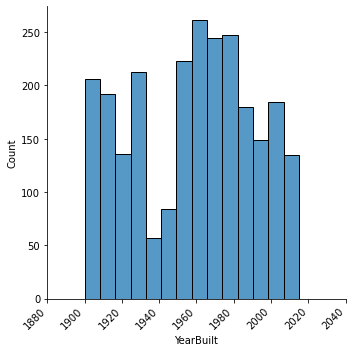

In [227]:
variable_quali=['BuildingType','PrimaryPropertyType',
                    'ZipCode',
                    'CouncilDistrictCode','Neighborhood','YearBuilt']

for vq in variable_quali :

    a=sns.displot(data=df_NRJ[vq])
    a.set_xticklabels(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    

# variables sur lesquelles nous voulons appliquer un LabelEncoder sont :
# BuildingType, Neighborhood, CouncilDistrictCode 
# YearBuilt encodé en décennie (1970-1979 : 70, 2010-2019 : 110...)
# --> suffisamment discriminant et pas trop de valeurs différentes


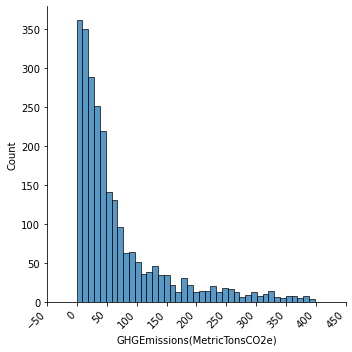

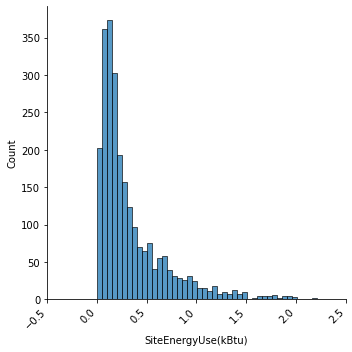

In [228]:
a=sns.displot(data=df_NRJ['GHGEmissions(MetricTonsCO2e)'])
a.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()

a=sns.displot(data=df_NRJ['SiteEnergyUse(kBtu)'])
a.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()

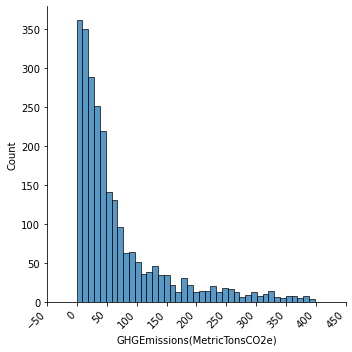

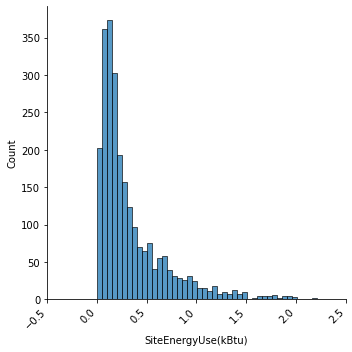

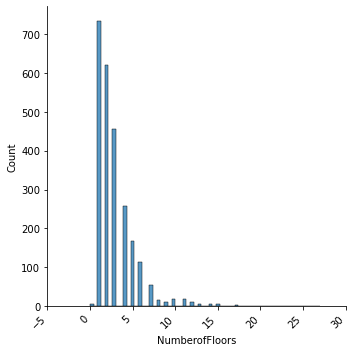

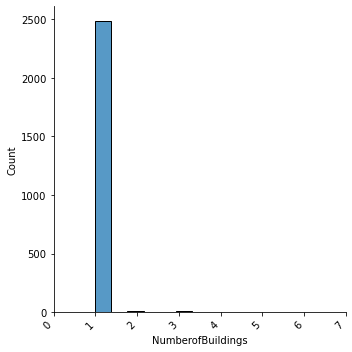

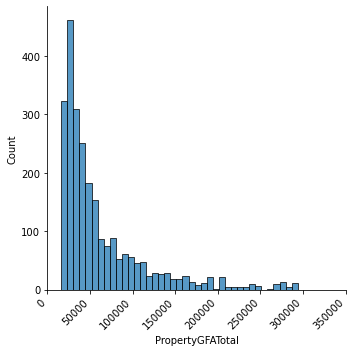

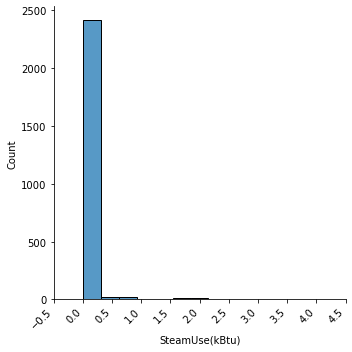

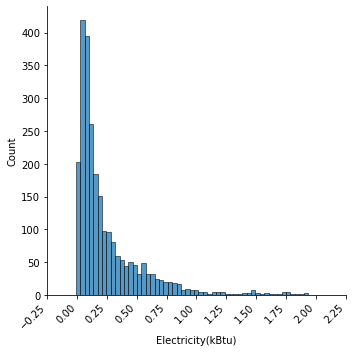

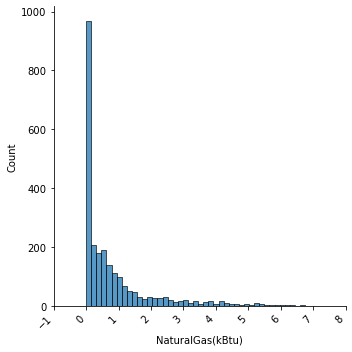

In [229]:
variable_quanti=['GHGEmissions(MetricTonsCO2e)',
'SiteEnergyUse(kBtu)',
'NumberofFloors',
'NumberofBuildings',
'PropertyGFATotal',
'SteamUse(kBtu)',
'Electricity(kBtu)',
'NaturalGas(kBtu)']

for vq in variable_quanti :

    a=sns.displot(data=df_NRJ[vq])
    a.set_xticklabels(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [230]:
df_NRJ[variable_quanti].skew(axis=0)

GHGEmissions(MetricTonsCO2e)     1.958911
SiteEnergyUse(kBtu)              1.987499
NumberofFloors                   3.037293
NumberofBuildings               14.513440
PropertyGFATotal                 2.087334
SteamUse(kBtu)                   6.835719
Electricity(kBtu)                2.459898
NaturalGas(kBtu)                 2.156845
dtype: float64

In [231]:
df_NRJ.shape

(2511, 30)

In [232]:
# test sur un passage au log des trois variables floor buildings et Property GFA

df_NRJ=df_NRJ[df_NRJ['NumberofFloors']>0]

df_NRJ['log_NumberofFloors']=np.log(df_NRJ['NumberofFloors'])
df_NRJ['log_NumberofBuildings']=np.log(df_NRJ['NumberofBuildings'])
df_NRJ['log_PropertyGFATotal']=np.log(df_NRJ['PropertyGFATotal'])

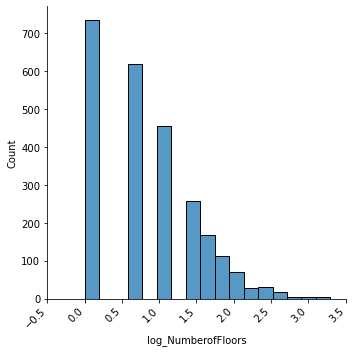

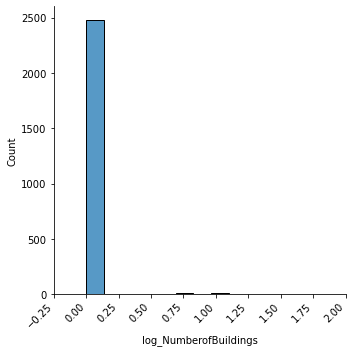

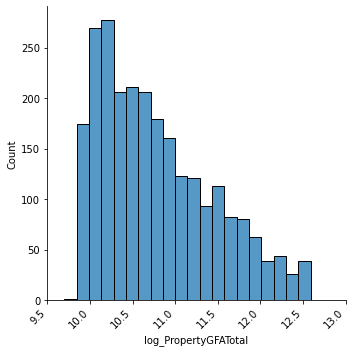

In [233]:
variable_quanti_V2=['log_NumberofFloors',
'log_NumberofBuildings',
'log_PropertyGFATotal']

for vq in variable_quanti_V2 :

    a=sns.displot(data=df_NRJ[vq])
    a.set_xticklabels(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [234]:
df_NRJ[variable_quanti_V2].skew(axis=0)

log_NumberofFloors        0.366597
log_NumberofBuildings    11.492736
log_PropertyGFATotal      0.723965
dtype: float64

In [235]:
# --> nous supprimons la variable numberofbuildings qui est inexploitable (et en réalité pas vraiment discriminante)



### LabelEncoder 

In [236]:
from sklearn.preprocessing import OneHotEncoder

In [237]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()


In [238]:

df_NRJ.shape

(2505, 33)

In [239]:
one_hot_Neighborhood = pd.get_dummies(df_NRJ['Neighborhood'])

df_NRJ = df_NRJ.join(one_hot_Neighborhood)

In [240]:
one_hot_CouncilDistrictCode = pd.get_dummies(df_NRJ['CouncilDistrictCode'])

df_NRJ = df_NRJ.join(one_hot_CouncilDistrictCode)

In [241]:
df_NRJ.rename(columns={1:'CouncilDistrictCode_1'},inplace=True)
df_NRJ.rename(columns={2:'CouncilDistrictCode_2'},inplace=True)
df_NRJ.rename(columns={3:'CouncilDistrictCode_3'},inplace=True)
df_NRJ.rename(columns={4:'CouncilDistrictCode_4'},inplace=True)
df_NRJ.rename(columns={5:'CouncilDistrictCode_5'},inplace=True)
df_NRJ.rename(columns={6:'CouncilDistrictCode_6'},inplace=True)
df_NRJ.rename(columns={7:'CouncilDistrictCode_7'},inplace=True)

In [242]:
df_NRJ['YearBuilt'].describe()

count    2505.000000
mean     1957.815968
std        32.554833
min      1900.000000
25%      1927.000000
50%      1962.000000
75%      1984.000000
max      2015.000000
Name: YearBuilt, dtype: float64

In [243]:
df_NRJ=df_NRJ.reset_index(drop=True)

In [244]:
# YearBuilt


df_NRJ['Decade']=0

#dec=0

for i in range(df_NRJ.shape[0]):
    if df_NRJ['YearBuilt'][i]<1910:
        df_NRJ.at[i, 'Decade']=0
        
    elif df_NRJ['YearBuilt'][i]>=1910 and df_NRJ['YearBuilt'][i]<1920:
        df_NRJ.at[i, 'Decade']=10
        
    elif df_NRJ['YearBuilt'][i]>=1920 and df_NRJ['YearBuilt'][i]<1930:
        df_NRJ.at[i, 'Decade']=20
        
    elif df_NRJ['YearBuilt'][i]>=1930 and df_NRJ['YearBuilt'][i]<1940:
        df_NRJ.at[i, 'Decade']=30
        
    elif df_NRJ['YearBuilt'][i]>=1940 and df_NRJ['YearBuilt'][i]<1950:
        df_NRJ.at[i, 'Decade']=40  
        
    elif df_NRJ['YearBuilt'][i]>=1950 and df_NRJ['YearBuilt'][i]<1960:
        df_NRJ.at[i, 'Decade']=50  
        
    elif df_NRJ['YearBuilt'][i]>=1960 and df_NRJ['YearBuilt'][i]<1970:
        df_NRJ.at[i, 'Decade']=60
        
    elif df_NRJ['YearBuilt'][i]>=1970 and df_NRJ['YearBuilt'][i]<1980:
        df_NRJ.at[i, 'Decade']=70
        
    elif df_NRJ['YearBuilt'][i]>=1980 and df_NRJ['YearBuilt'][i]<1990:
        df_NRJ.at[i, 'Decade']=80
        
    elif df_NRJ['YearBuilt'][i]>=1990 and df_NRJ['YearBuilt'][i]<2000:
        df_NRJ.at[i, 'Decade']=90
        
    elif df_NRJ['YearBuilt'][i]>=2000 and df_NRJ['YearBuilt'][i]<2010:
        df_NRJ.at[i, 'Decade']=100
        
    elif df_NRJ['YearBuilt'][i]>=2010 and df_NRJ['YearBuilt'][i]<2020:
        df_NRJ.at[i, 'Decade']=110
        
        
        
#df_NRJ['Decade']=decade
        

In [245]:
df_NRJ['YearBuilt'].isnull().sum()

0

In [246]:
df_NRJ.head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,ThirdLargestPropertyUseTypeGFA,Electricity,Steam,NaturalGas,log_NumberofFloors,log_NumberofBuildings,log_PropertyGFATotal,BALLARD,CENTRAL,DELRIDGE,DOWNTOWN,EAST,GREATER DUWAMISH,LAKE UNION,MAGNOLIA / QUEEN ANNE,NORTH,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,Decade
0,1,2015,NonResidential,Hotel,405 olive way,98101.0,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,Compliant,249.43,2.64,0.0,31.0,14.0,NaN,1,0,0,2.484907,0.0,11.390012,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20
1,2,2015,NonResidential,Hotel,724 pine st,98101.0,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,Compliant,263.51,2.38,0.0,31.0,14.0,NaN,0,0,1,2.397895,0.0,11.547964,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,90
2,10,2015,NonResidential,Hotel,1619 9th ave,98101.0,660000825,7,DOWNTOWN,1926,1.0,11.0,83008,25.0,76.9,149.5,6252842.0,0.0,2679698.0,3573255.0,Compliant,208.46,2.37,0.0,31.0,14.0,NaN,0,0,1,2.397895,0.0,11.326692,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20
3,11,2015,NonResidential,Other,901 pine st,98101.0,660000955,7,DOWNTOWN,1926,1.0,8.0,102761,NaN,62.5,152.2,6426022.0,2003108.0,4108004.0,315079.0,Compliant,199.99,1.77,0.0,31.0,14.0,NaN,1,0,0,2.079442,0.0,11.540161,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20
4,12,2015,NonResidential,Hotel,612 2nd ave,98104.0,939000080,7,DOWNTOWN,1904,1.0,15.0,163984,46.0,77.0,174.6,12633744.0,0.0,7355649.0,5278400.0,Compliant,331.61,1.83,0.0,19.0,14.0,NaN,1,0,0,2.708050,0.0,12.007524,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,17,2015,NonResidential,Hotel,400 spring st,98104.0,942000210,7,DOWNTOWN,1928,1.0,9.0,65009,39.0,104.7,166.5,6807227.0,1987163.0,1615057.0,3205074.0,Compliant,334.87,5.04,0.0,19.0,14.0,NaN,0,0,1,2.197225,0.0,11.082281,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20
6,24,2015,NonResidential,Mixed Use Property,810 4th ave,98104.0,942000510,7,DOWNTOWN,1907,1.0,5.0,57452,NaN,130.2,278.7,7481768.0,1755365.0,3773975.0,1952583.0,Compliant,265.50,4.34,0.0,19.0,14.0,NaN,1,0,0,1.609438,0.0,10.958705,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,29,2015,NonResidential,Hotel,4242 roosevelt way ne,98105.0,1142000755,4,NORTHEAST,2001,1.0,6.0,88592,85.0,66.9,151.5,3880806.0,0.0,2254751.0,1626149.0,Compliant,102.08,1.04,0.0,38.0,60.0,NaN,1,0,0,1.791759,0.0,11.391797,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,100
8,30,2015,NonResidential,College/University,1000 lenora st,98121.0,660001420,7,DOWNTOWN,1928,1.0,7.0,126593,NaN,78.3,158.9,9791557.0,0.0,4582663.0,5209084.0,Compliant,308.60,2.28,0.0,7.0,56.0,NaN,0,0,1,1.945910,0.0,11.748732,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20
9,31,2015,NonResidential,Other,1017 olive way,98101.0,660001725,7,DOWNTOWN,1930,1.0,2.0,67224,NaN,20.7,64.9,1388717.0,0.0,1388775.0,0.0,Compliant,9.68,0.06,0.0,31.0,14.0,NaN,1,0,0,0.693147,0.0,11.115786,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30


In [247]:
one_hot_Decade = pd.get_dummies(df_NRJ['Decade'])

df_NRJ = df_NRJ.join(one_hot_Decade)

In [248]:
df_NRJ.head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,ThirdLargestPropertyUseTypeGFA,Electricity,Steam,NaturalGas,log_NumberofFloors,log_NumberofBuildings,log_PropertyGFATotal,BALLARD,CENTRAL,DELRIDGE,DOWNTOWN,EAST,GREATER DUWAMISH,LAKE UNION,MAGNOLIA / QUEEN ANNE,NORTH,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,Decade,0,10,20,30,40,50,60,70,80,90,100,110
0,1,2015,NonResidential,Hotel,405 olive way,98101.0,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,Compliant,249.43,2.64,0.0,31.0,14.0,NaN,1,0,0,2.484907,0.0,11.390012,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,0,0,1,0,0,0,0,0,0,0,0,0
1,2,2015,NonResidential,Hotel,724 pine st,98101.0,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,Compliant,263.51,2.38,0.0,31.0,14.0,NaN,0,0,1,2.397895,0.0,11.547964,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,90,0,0,0,0,0,0,0,0,0,1,0,0
2,10,2015,NonResidential,Hotel,1619 9th ave,98101.0,660000825,7,DOWNTOWN,1926,1.0,11.0,83008,25.0,76.9,149.5,6252842.0,0.0,2679698.0,3573255.0,Compliant,208.46,2.37,0.0,31.0,14.0,NaN,0,0,1,2.397895,0.0,11.326692,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,0,0,1,0,0,0,0,0,0,0,0,0
3,11,2015,NonResidential,Other,901 pine st,98101.0,660000955,7,DOWNTOWN,1926,1.0,8.0,102761,NaN,62.5,152.2,6426022.0,2003108.0,4108004.0,315079.0,Compliant,199.99,1.77,0.0,31.0,14.0,NaN,1,0,0,2.079442,0.0,11.540161,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,0,0,1,0,0,0,0,0,0,0,0,0
4,12,2015,NonResidential,Hotel,612 2nd ave,98104.0,939000080,7,DOWNTOWN,1904,1.0,15.0,163984,46.0,77.0,174.6,12633744.0,0.0,7355649.0,5278400.0,Compliant,331.61,1.83,0.0,19.0,14.0,NaN,1,0,0,2.708050,0.0,12.007524,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5,17,2015,NonResidential,Hotel,400 spring st,98104.0,942000210,7,DOWNTOWN,1928,1.0,9.0,65009,39.0,104.7,166.5,6807227.0,1987163.0,1615057.0,3205074.0,Compliant,334.87,5.04,0.0,19.0,14.0,NaN,0,0,1,2.197225,0.0,11.082281,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,0,0,1,0,0,0,0,0,0,0,0,0
6,24,2015,NonResidential,Mixed Use Property,810 4th ave,98104.0,942000510,7,DOWNTOWN,1907,1.0,5.0,57452,NaN,130.2,278.7,7481768.0,1755365.0,3773975.0,1952583.0,Compliant,265.50,4.34,0.0,19.0,14.0,NaN,1,0,0,1.609438,0.0,10.958705,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
7,29,2015,NonResidential,Hotel,4242 roosevelt way ne,98105.0,1142000755,4,NORTHEAST,2001,1.0,6.0,88592,85.0,66.9,151.5,3880806.0,0.0,2254751.0,1626149.0,Compliant,102.08,1.04,0.0,38.0,60.0,NaN,1,0,0,1.791759,0.0,11.391797,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,100,0,0,0,0,0,0,0,0,0,0,1,0
8,30,2015,NonResidential,College/University,1000 lenora st,98121.0,660001420,7,DOWNTOWN,1928,1.0,7.0,126593,NaN,78.3,158.9,9791557.0,0.0,4582663.0,5209084.0,Compliant,308.60,2.28,0.0,7.0,56.0,NaN,0,0,1,1.945910,0.0,11.748732,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,0,0,1,0,0,0,0,0,0,0,0,0
9,31,2015,NonResidential,Other,1017 olive way,98101.0,660001725,7,DOWNTOWN,1930,1.0,2.0,67224,NaN,20.7,64.9,1388717.0,0.0,1388775.0,0.0,Compliant,9.68,0.06,0.0,31.0,14.0,NaN,1,0,0,0.693147,0.0,11.115786,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30,0,0,0,1,0,0,0,0,0,0,0,0


In [249]:
df_NRJ.rename(columns={0:'1900_1909'},inplace=True)
df_NRJ.rename(columns={10:'1910_1919'},inplace=True)
df_NRJ.rename(columns={20:'1920_1929'},inplace=True)
df_NRJ.rename(columns={30:'1930_1939'},inplace=True)
df_NRJ.rename(columns={40:'1940_1949'},inplace=True)
df_NRJ.rename(columns={50:'1950_1959'},inplace=True)
df_NRJ.rename(columns={60:'1960_1969'},inplace=True)
df_NRJ.rename(columns={70:'1970_1979'},inplace=True)
df_NRJ.rename(columns={80:'1980_1989'},inplace=True)
df_NRJ.rename(columns={90:'1990_1999'},inplace=True)
df_NRJ.rename(columns={100:'2000_2009'},inplace=True)
df_NRJ.rename(columns={110:'2010_2019'},inplace=True)

In [250]:
#df_NRJ.head(100)

In [251]:
# encodage sur les primarypropertytypes

In [252]:
df_NRJ['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    572
Other                          312
Large Office                   183
Non-Refrigerated Warehouse     179
Warehouse                      175
Retail Store                   173
Mixed Use Property             169
Worship Facility               139
Hotel                          107
K-12 School                     77
Medical Office                  55
Distribution Center             50
Distribution Center\n           47
Supermarket / Grocery Store     37
Supermarket/Grocery Store       36
Self-Storage Facility           29
Senior Care Community           28
Self-Storage Facility\n         27
Refrigerated Warehouse          25
Residence Hall                  17
Residence Hall/Dormitory        15
College/University              14
University                      13
Restaurant                      11
Restaurant\n                     8
Laboratory                       3
Hospital                         2
Low-Rise Multifamily             2
Name: PrimaryPropert

In [253]:
df_NRJ_test=df_NRJ

In [254]:
##### ignore les autres cellules que celles spécifiées dans map, remplace par nan. A améliorer. Reprendre ici.



df_NRJ['PrimaryPropertyType'] = df_NRJ['PrimaryPropertyType'].replace({'K-12 School':'K_12 School',
                                                        'Distribution Center\n':'Distribution Center',
                                                         'Supermarket / Grocery Store':'Supermarket_Grocery Store',
                                                         'Supermarket/Grocery Store':'Supermarket_Grocery Store',          
                                                         'Self-Storage Facility':'Self_Storage Facility',          
                                                         'Self-Storage Facility\n':'Self_Storage Facility',  
                                                         'Restaurant\n':'Restaurant',           
                                                         'Residence Hall':'Residence Hall/Dormitory',           
                                                         'University':'College/University',           
                                                        'Self-Storage Facility\n':'Self_Storage Facility',
                                                        'Non-Refrigerated Warehouse':'Warehouse',
                                                        'Refrigerated Warehouse':'Warehouse'})
                          #   ,na_action='ignore')

In [255]:
df_NRJ['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    572
Warehouse                      379
Other                          312
Large Office                   183
Retail Store                   173
Mixed Use Property             169
Worship Facility               139
Hotel                          107
Distribution Center             97
K_12 School                     77
Supermarket_Grocery Store       73
Self_Storage Facility           56
Medical Office                  55
Residence Hall/Dormitory        32
Senior Care Community           28
College/University              27
Restaurant                      19
Laboratory                       3
Hospital                         2
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

In [256]:
one_hot_PrimaryPropertyType = pd.get_dummies(df_NRJ['PrimaryPropertyType'])

df_NRJ = df_NRJ.join(one_hot_PrimaryPropertyType)

In [257]:
df_NRJ

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,ThirdLargestPropertyUseTypeGFA,Electricity,Steam,NaturalGas,log_NumberofFloors,log_NumberofBuildings,log_PropertyGFATotal,BALLARD,CENTRAL,DELRIDGE,DOWNTOWN,EAST,GREATER DUWAMISH,LAKE UNION,MAGNOLIA / QUEEN ANNE,NORTH,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,Decade,1900_1909,1910_1919,1920_1929,1930_1939,1940_1949,1950_1959,1960_1969,1970_1979,1980_1989,1990_1999,2000_2009,2010_2019,College/University,Distribution Center,Hospital,Hotel,K_12 School,Laboratory,Large Office,Low-Rise Multifamily,Medical Office,Mixed Use Property,Other,Residence Hall/Dormitory,Restaurant,Retail Store,Self_Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket_Grocery Store,Warehouse,Worship Facility
0,1,2015,NonResidential,Hotel,405 olive way,98101.0,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,65.0,78.900000,173.500000,6981428.00,2023032.0,3686160.0,1272388.0,Compliant,249.43,2.64,0.0,31.0,14.0,NaN,1,0,0,2.484907,0.0,11.390012,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2015,NonResidential,Hotel,724 pine st,98101.0,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,51.0,94.400000,191.300000,8354235.00,0.0,3905411.0,4448985.0,Compliant,263.51,2.38,0.0,31.0,14.0,NaN,0,0,1,2.397895,0.0,11.547964,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,90,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10,2015,NonResidential,Hotel,1619 9th ave,98101.0,660000825,7,DOWNTOWN,1926,1.0,11.0,83008,25.0,76.900000,149.500000,6252842.00,0.0,2679698.0,3573255.0,Compliant,208.46,2.37,0.0,31.0,14.0,NaN,0,0,1,2.397895,0.0,11.326692,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11,2015,NonResidential,Other,901 pine st,98101.0,660000955,7,DOWNTOWN,1926,1.0,8.0,102761,NaN,62.500000,152.200000,6426022.00,2003108.0,4108004.0,315079.0,Compliant,199.99,1.77,0.0,31.0,14.0,NaN,1,0,0,2.079442,0.0,11.540161,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,12,2015,NonResidential,Hotel,612 2nd ave,98104.0,939000080,7,DOWNTOWN,1904,1.0,15.0,163984,46.0,77.000000,174.600000,12633744.00,0.0,7355649.0,5278400.0,Compliant,331.61,1.83,0.0,19.0,14.0,NaN,1,0,0,2.708050,0.0,12.007524,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,50062,2016,NonResidential,Hotel,3926 aurora ave n,98103.0,1931300480,4,LAKE UNION,2014,1.0,4.0,126823,72.0,68.500000,169.500000,6042399.50,0.0,4115620.0,1926779.0,Compliant,131.02,1.03,NaN,NaN,NaN,0.0,1,0,0,1.386294,0.0,11.750548,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,110,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2501,50068,2016,NonResidential,Warehouse,6518 ellis,98108.0,2824049007,2,GREATER DUWAMISH,1955,1.0,1.0,52085,37.0,69.199997,102.099998,3605855.50,0.0,732803.0,2873052.0,Compliant,157.70,3.03,NaN,NaN,NaN,0.0,0,0,1,0.000000,0.0,10.860632,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,50,0,0,0,0,0,1,0,0,0,0,

In [258]:
to_drop=['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','GHGEmissionsIntensity(kgCO2e/ft2)','OtherFuelUse(kBtu)',
        'SPD Beats','Seattle Police Department Micro Community Policing Plan Areas']

df_NRJ.drop(to_drop,axis='columns',inplace=True)

In [259]:

#df_NRJ.to_csv('P4_Modelisation.csv')
